In [1]:
import pandas as pd
import datetime

import json as json
from pandas.io.json import json_normalize

import numpy as np
import os
import scipy.optimize as sco
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
array_dataframe = []
dados = pd.DataFrame([])

folder_candle = '14400seconds'

for entry in os.scandir(folder_candle):
    if entry.is_file():
        coin_symbol = (os.path.splitext(entry.name)[0])        
        with open(entry.path) as d:            
            coin_hist = json.load(d);
        df = json_normalize(coin_hist);
        
        df['coin'] = coin_symbol
        df['date'] = pd.to_datetime(df['date'], unit='s')
        df['date_chart'] = pd.to_datetime(df['date'], unit='s', format='%Y-%m-%d').dt.date
        df['variation'] = df['close'].sub(df['open'])        
        df['return'] = np.divide(df['close'].sub(df['open']),df["close"].shift(1))
        df['log_return'] = np.log(df['return'])
        df['log_volume'] = np.log(df['volume'])
        
        array_dataframe.append(df)       
        
dados = pd.concat(array_dataframe)

dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)

dados.head()

/home/nikolasmagno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/nikolasmagno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log
/home/nikolasmagno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


close                date        high         low        open  \
0  540.000000 2017-08-14 00:00:00    0.330000  200.000000    0.330000   
1  301.921559 2017-08-14 04:00:00  540.000000  300.000000  500.000000   
2  304.950000 2017-08-14 08:00:00  314.743723  300.000000  307.200000   
3  300.490000 2017-08-14 12:00:00  309.100001  293.000000  305.700000   
4  296.000000 2017-08-14 16:00:00  300.490200  289.977286  300.489999   

   quoteVolume        volume  weightedAverage      coin  date_chart  \
0   994.980943  4.361499e+05       438.349981  USDT_BCH  2017-08-14   
1  2051.860477  7.042301e+05       343.215374  USDT_BCH  2017-08-14   
2  1715.091816  5.224386e+05       304.612616  USDT_BCH  2017-08-14   
3  3345.890570  1.005039e+06       300.380049  USDT_BCH  2017-08-14   
4  2798.249551  8.222882e+05       293.858060  USDT_BCH  2017-08-14   

    variation    return  log_return  log_volume  
0  539.670000  0.000000         0.0   12.985741  
1 -198.078441 -0.366812         0.0   13.464860  
2   -2.250000 -0.007452         0.0   13.166263  
3   -5.210000 -0.017085         0.0   13.820537  
4   -4.489999 -0.014942         0.0   13.619846

In [27]:
grouped_data = dados.groupby('coin', as_index=False)

sorted_grouped_data = sorted(
    grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
    key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
    reverse=True  # largest first
)

grouped_data.describe()

close                                                                \
    count         mean          std         min         25%         50%   
0  2470.0  1006.705045   584.693122  286.624038  566.407289  834.710181   
1  7908.0  3031.003492  3833.996608  178.719313  409.027950  769.804319   
2  7924.0   153.755367   239.070537    0.039997    5.899997   11.899525   
3  6891.0   212.501116   282.301495    0.419524    9.651008   18.529592   
4  7811.0    41.904492    63.304709    0.045000    3.520000    4.127739   
5  7924.0    61.801497    94.281448    0.099000    0.629792   10.170000   
6  7901.0     0.207660     0.370311    0.002250    0.006305    0.008700   

                                high                 ...     log_return  \
           75%           max   count         mean    ...            75%   
0  1291.602749   3709.440000  2470.0  1034.323559    ...            0.0   
1  6106.723250  19775.000000  7908.0  3075.767686    ...            0.0   
2   239.005795   1507.000000  7924.0   157.070342    ...            0.0   
3   333.000000   1387.000000  6891.0   216.381227    ...            0.0   
4    57.438508    359.722406  7811.0    42.791738    ...            0.0   
5    98.541442    475.000000  7924.0    63.192773    ...            0.0   
6     0.258200      3.136000  7901.0     0.213233    ...            0.0   

            log_volume                                                        \
        max      count       mean       std        min        25%        50%   
0  0.000000     2470.0  13.082319  1.461866   8.354071  12.037010  12.976409   
1  0.000000     7908.0  10.421580  5.261332  -9.853555   7.318392  11.691779   
2  0.238404     7924.0   6.492489  5.183726 -17.034386   0.000000   7.406511   
3  0.000000     6891.0  10.313381  4.531444  -8.650725   8.168256  11.544341   
4  0.000000     7811.0   7.031803  5.645137  -9.147178   1.102375   7.483160   
5  0.769290     7924.0   6.656951  5.539435 -14.201173   0.787240   8.636735   
6  0.011383     7901.0   6.735102  6.050133 -14.924173   0.000000   6.653549   

                         
         75%        max  
0  14.060013  18.068893  
1  14.819634  18.372493  
2  11.187290  15.429879  
3  13.827583  17.459862  
4  12.413650  17.146392  
5  11.292124  16.054210  
6  12.699582  17.826146  

[7 rows x 88 columns]

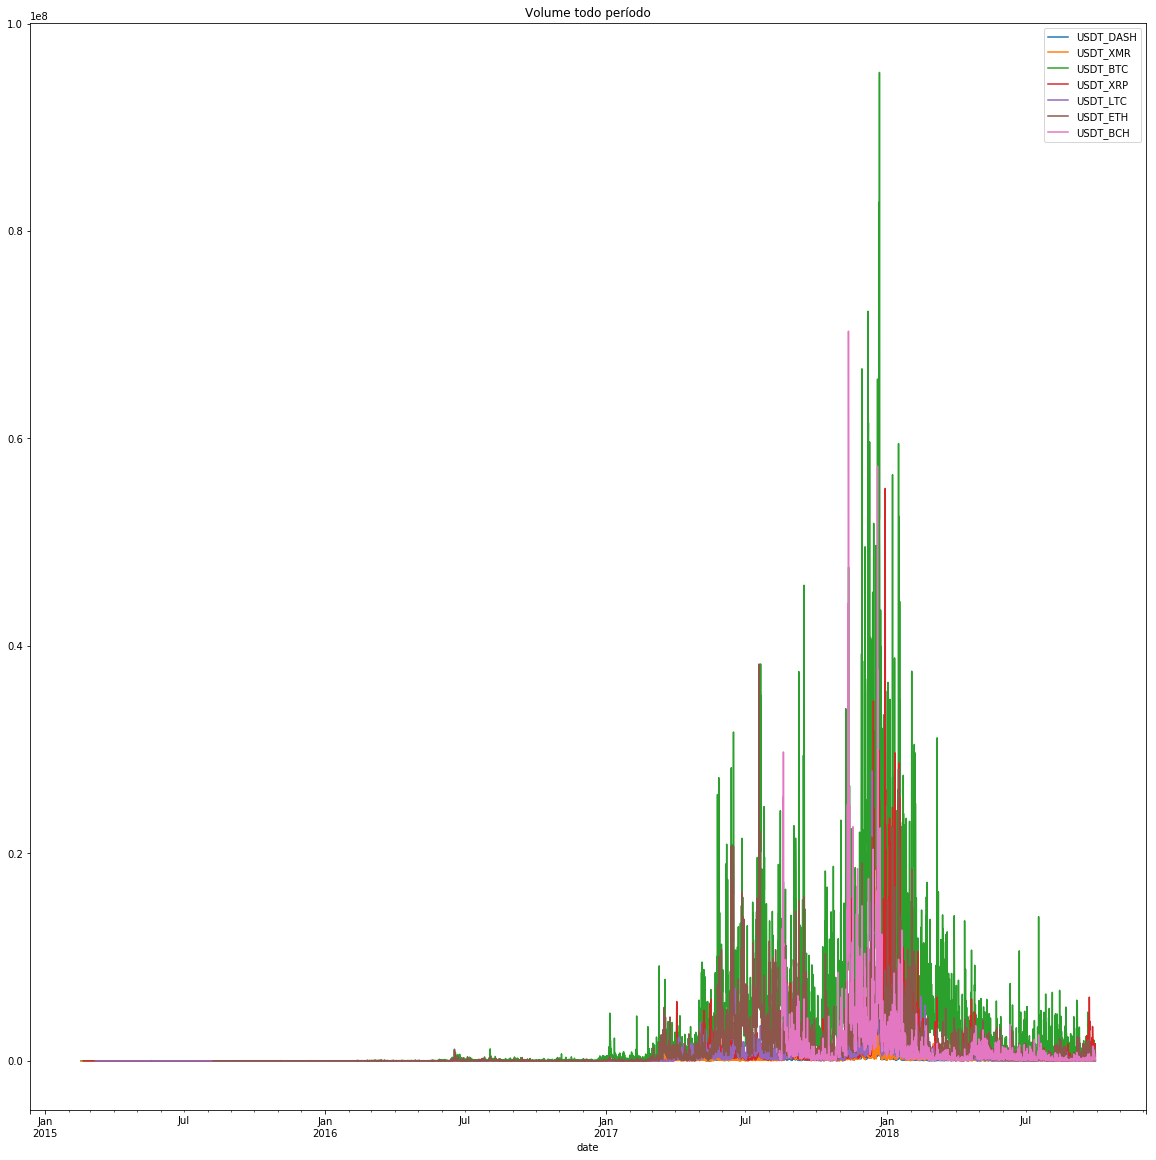

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )
    
    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
    
    plt.title('Volume todo período')

plot_all_histograms(grouped_data, plt, "date","volume")

In [5]:
seg_semestr2017 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2018,1,1)) ])
seg_semestr2017.set_index('date', inplace=True)
seg_semestr2017.head()

close        high         low        open  \
date                                                                  
2017-08-14 00:00:00  540.000000    0.330000  200.000000    0.330000   
2017-08-14 04:00:00  301.921559  540.000000  300.000000  500.000000   
2017-08-14 08:00:00  304.950000  314.743723  300.000000  307.200000   
2017-08-14 12:00:00  300.490000  309.100001  293.000000  305.700000   
2017-08-14 16:00:00  296.000000  300.490200  289.977286  300.489999   

                     quoteVolume        volume  weightedAverage      coin  \
date                                                                        
2017-08-14 00:00:00   994.980943  4.361499e+05       438.349981  USDT_BCH   
2017-08-14 04:00:00  2051.860477  7.042301e+05       343.215374  USDT_BCH   
2017-08-14 08:00:00  1715.091816  5.224386e+05       304.612616  USDT_BCH   
2017-08-14 12:00:00  3345.890570  1.005039e+06       300.380049  USDT_BCH   
2017-08-14 16:00:00  2798.249551  8.222882e+05       293.858060  USDT_BCH   

                     date_chart   variation    return  log_return  log_volume  
date                                                                           
2017-08-14 00:00:00  2017-08-14  539.670000  0.000000         0.0   12.985741  
2017-08-14 04:00:00  2017-08-14 -198.078441 -0.366812         0.0   13.464860  
2017-08-14 08:00:00  2017-08-14   -2.250000 -0.007452         0.0   13.166263  
2017-08-14 12:00:00  2017-08-14   -5.210000 -0.017085         0.0   13.820537  
2017-08-14 16:00:00  2017-08-14   -4.489999 -0.014942         0.0   13.619846

Text(0.5, 1.0, 'Volume Segundo Semestre 2017')

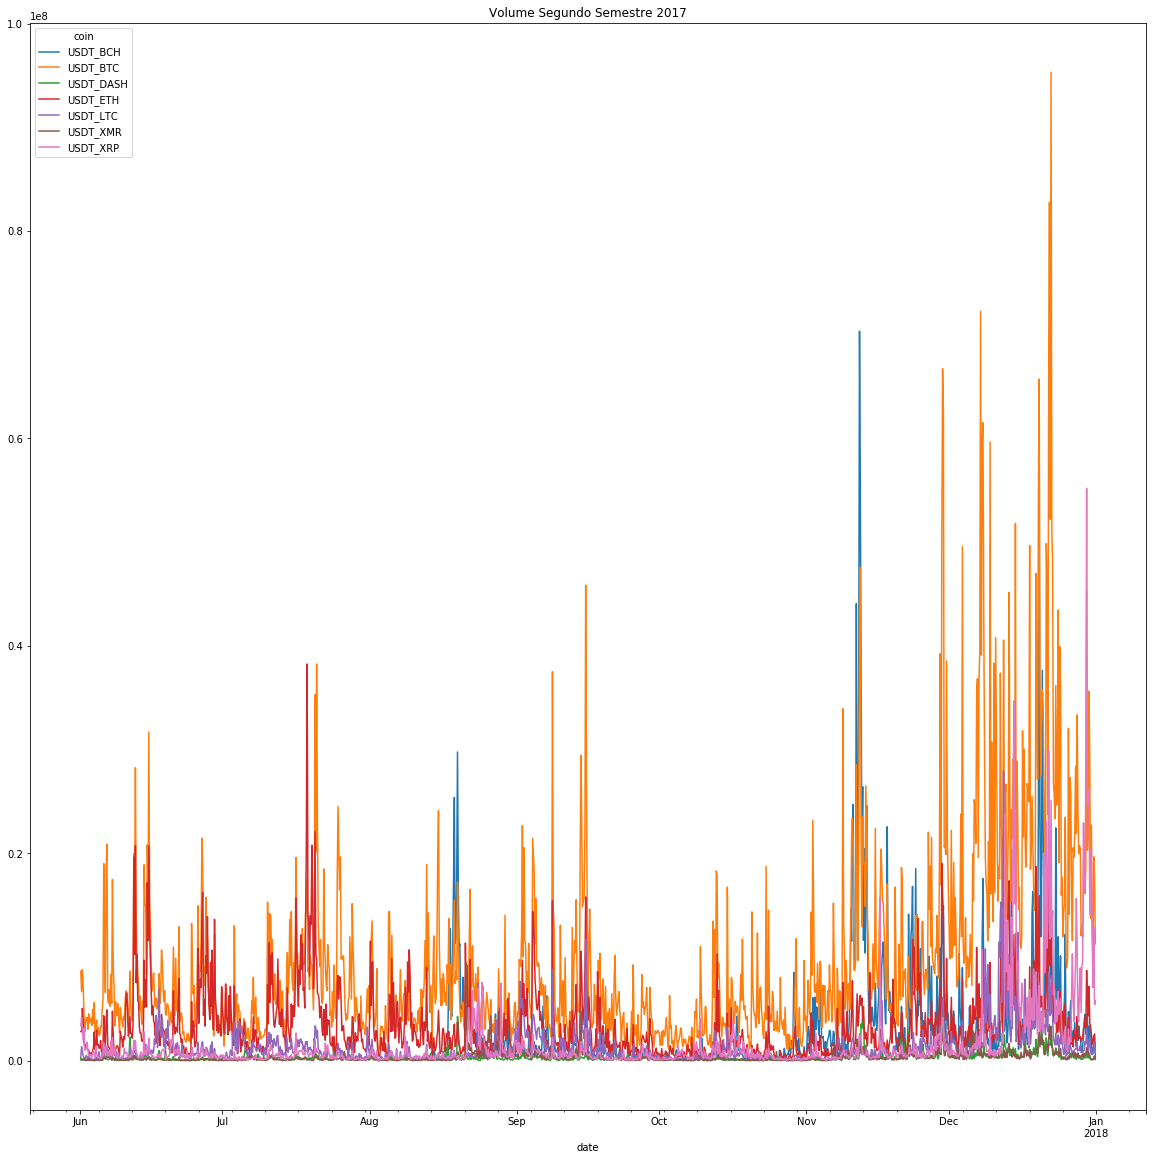

In [6]:
seg_semestr2017.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume Segundo Semestre 2017')

Text(0.5, 1.0, 'Volume mês de Junho')

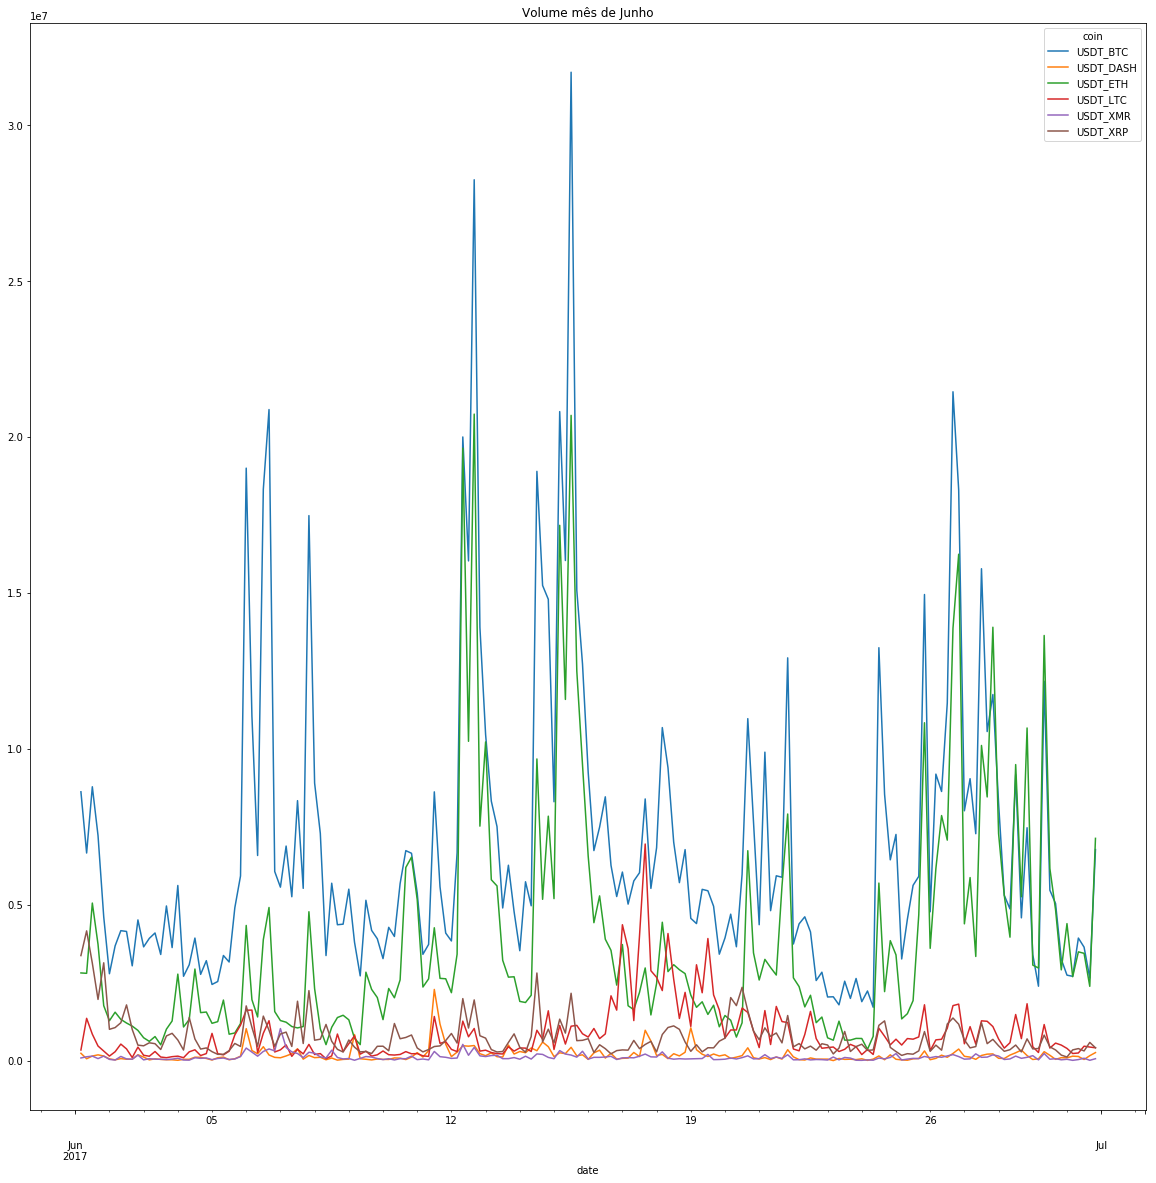

In [7]:
mes_jun = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2017,7,1)) ])

mes_jun.set_index('date', inplace=True)

mes_jun.pivot(columns='coin', values='volume').plot(kind='line', figsize=(20,20))
plt.title('Volume mês de Junho')

Text(0.5, 1.0, 'Volume 15 dias de junho')

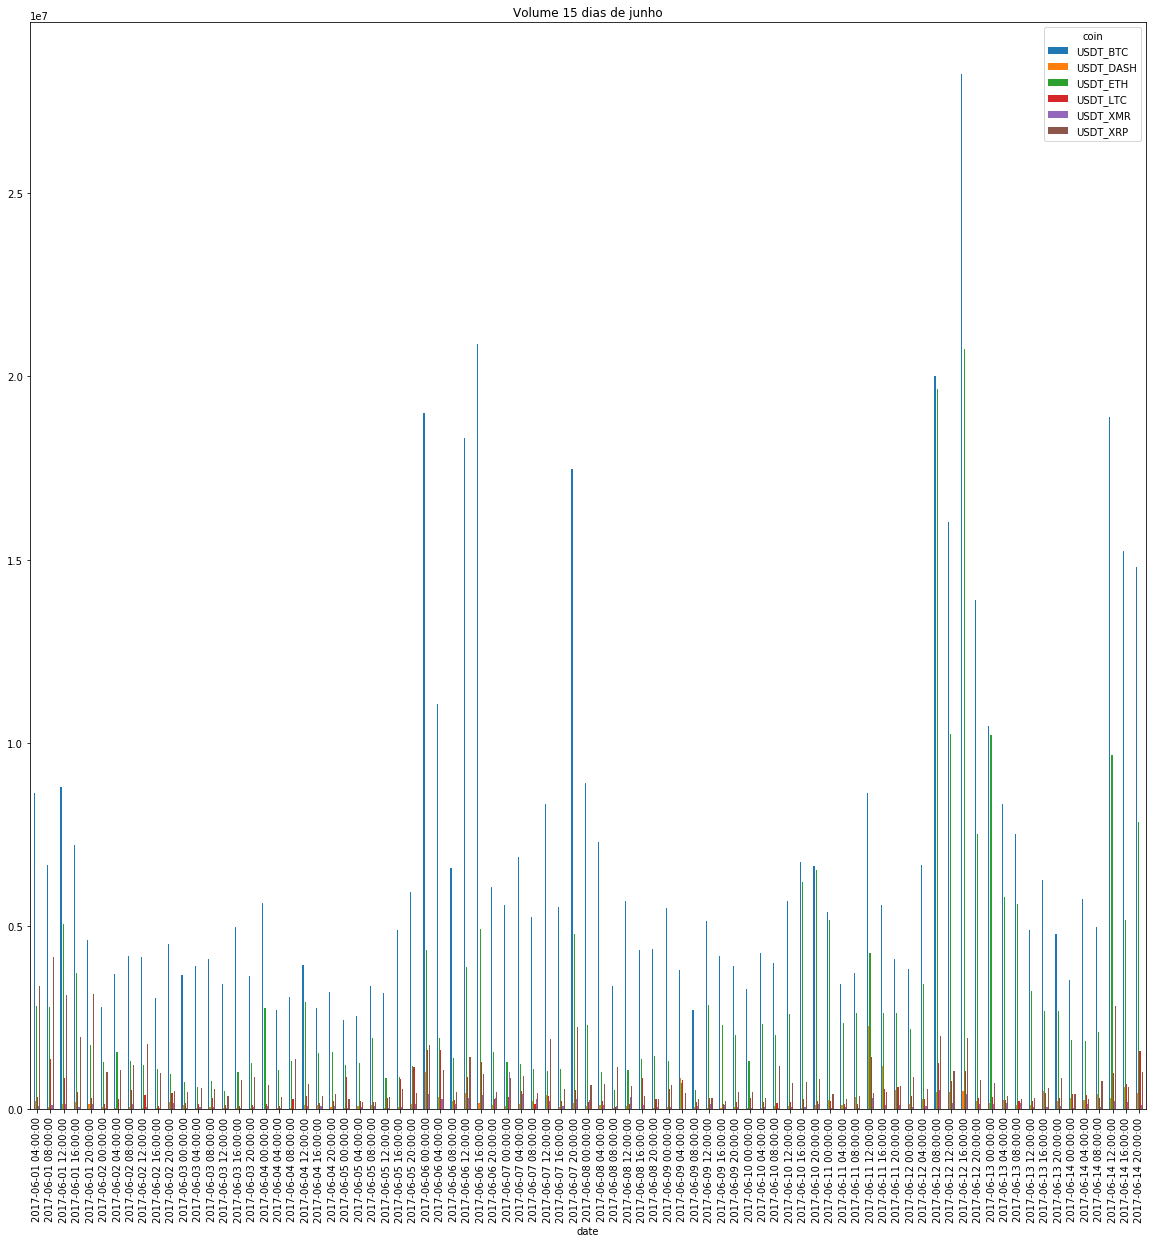

In [8]:
seg_part_jun = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2017,6,15)) ])

seg_part_jun.set_index('date', inplace=True)

seg_part_jun.pivot(columns='coin', values='volume').plot(kind='bar', figsize=(20,20))
plt.title('Volume 15 dias de junho')

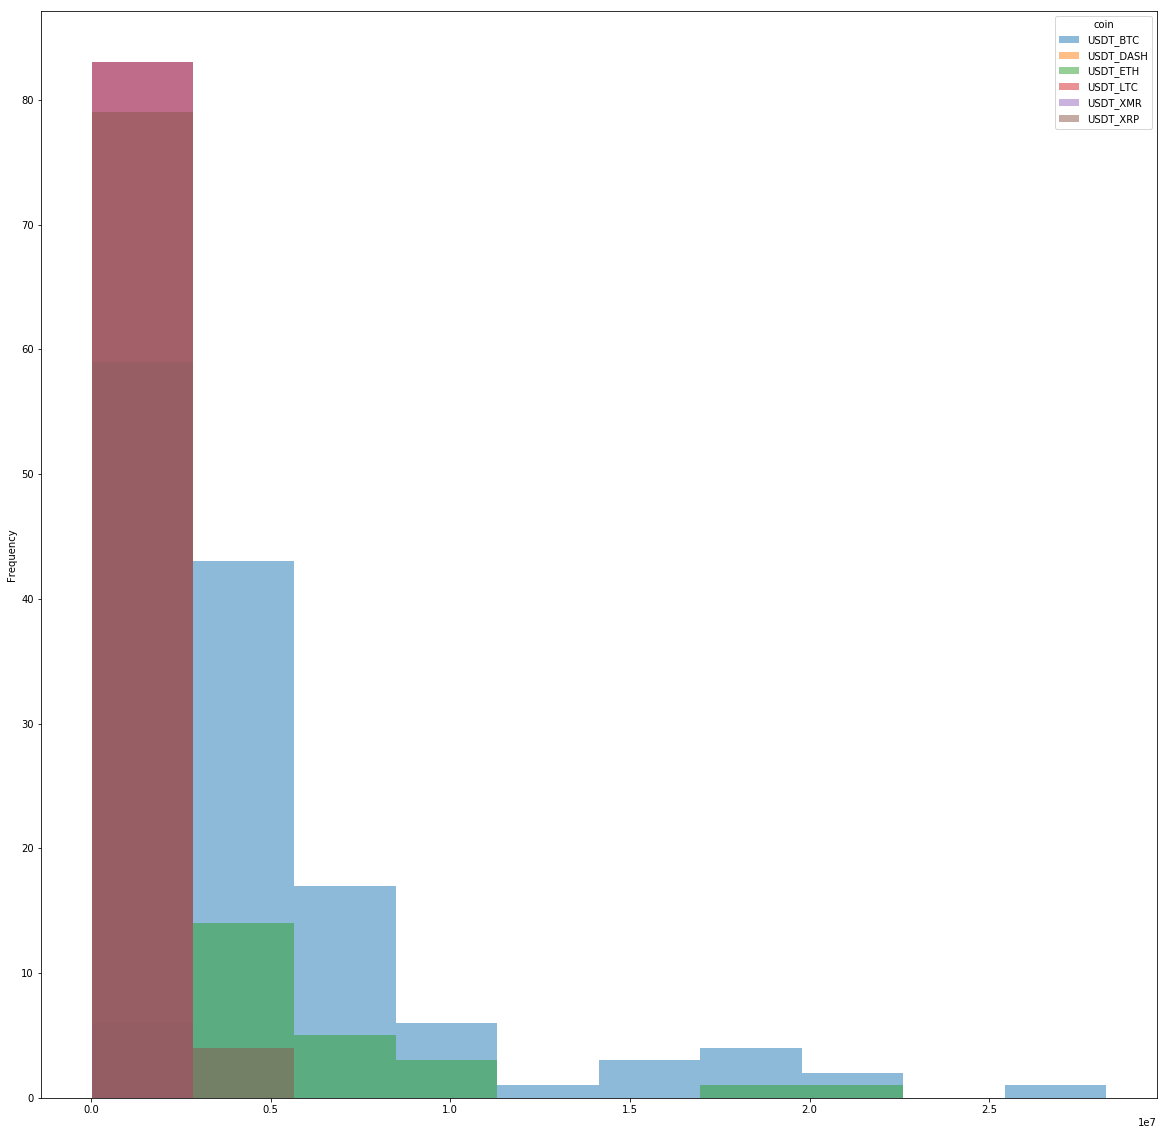

In [9]:
seg_part_jun.pivot(columns='coin', values='volume').plot(kind='hist', figsize=(20,20), alpha=0.5)

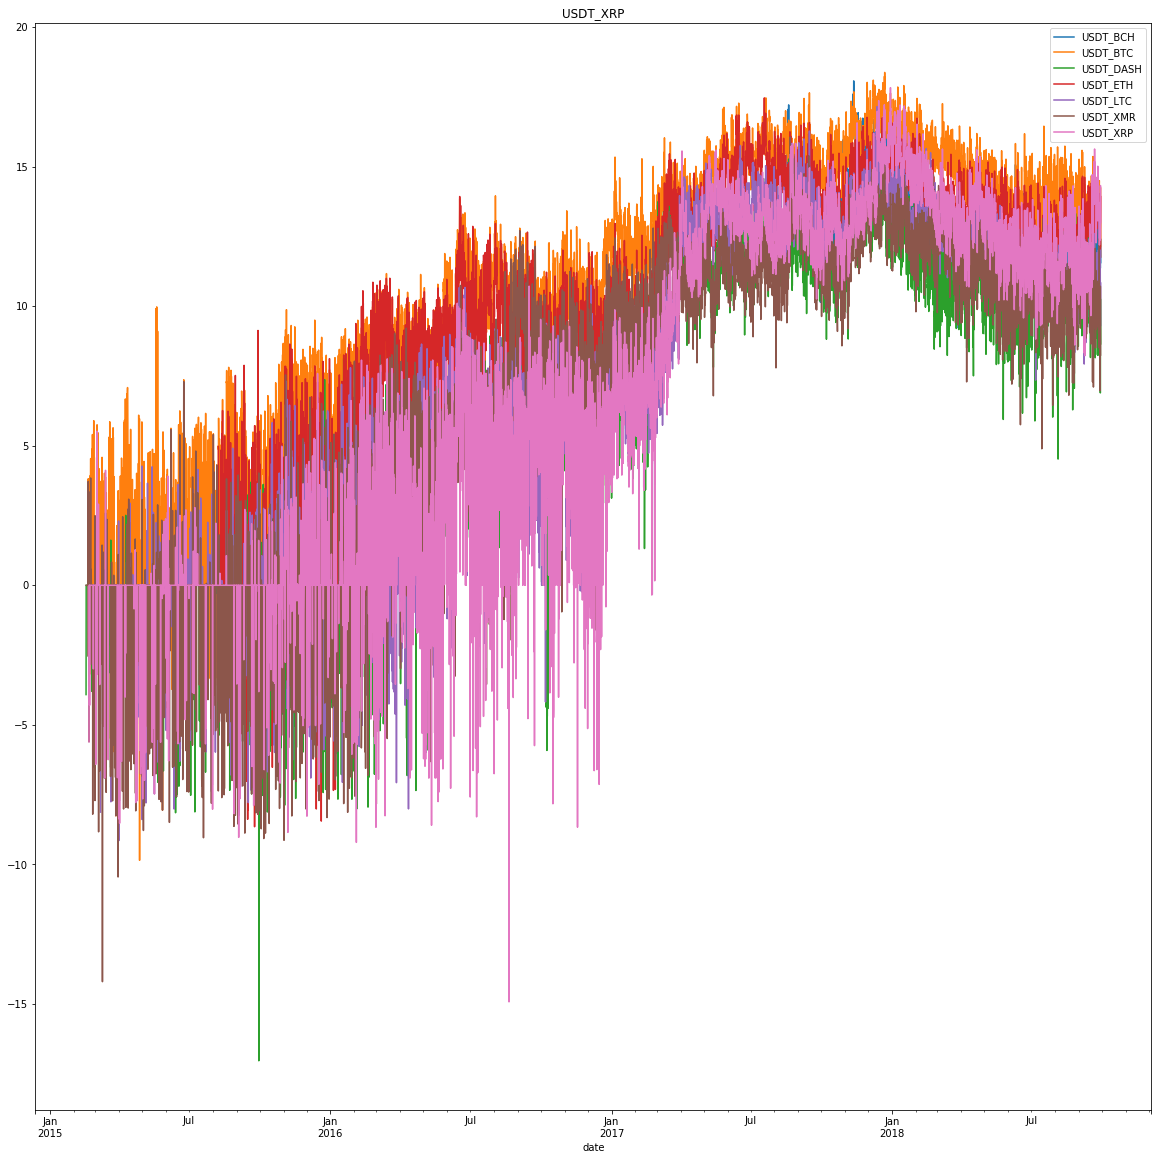

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
        
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","log_volume")

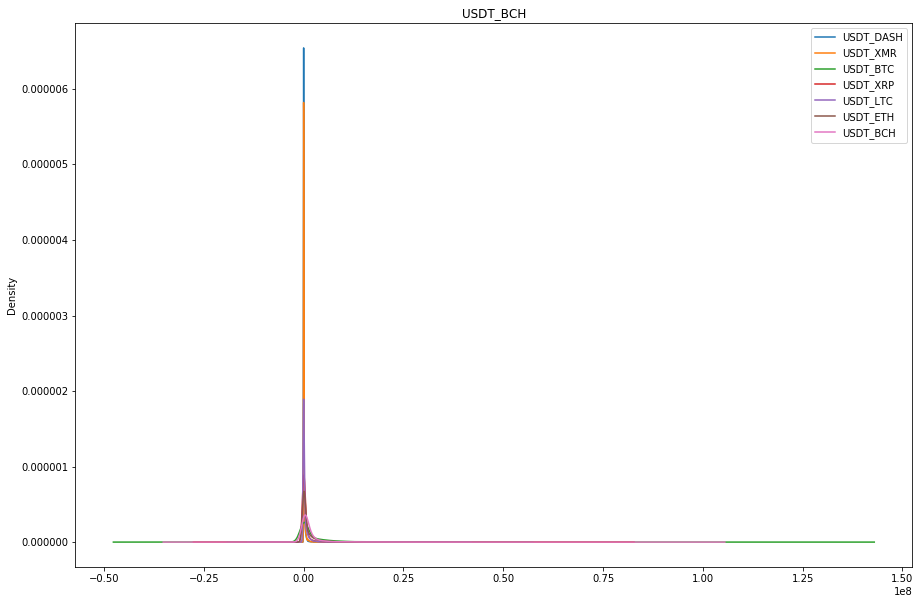

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='density',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","volume")

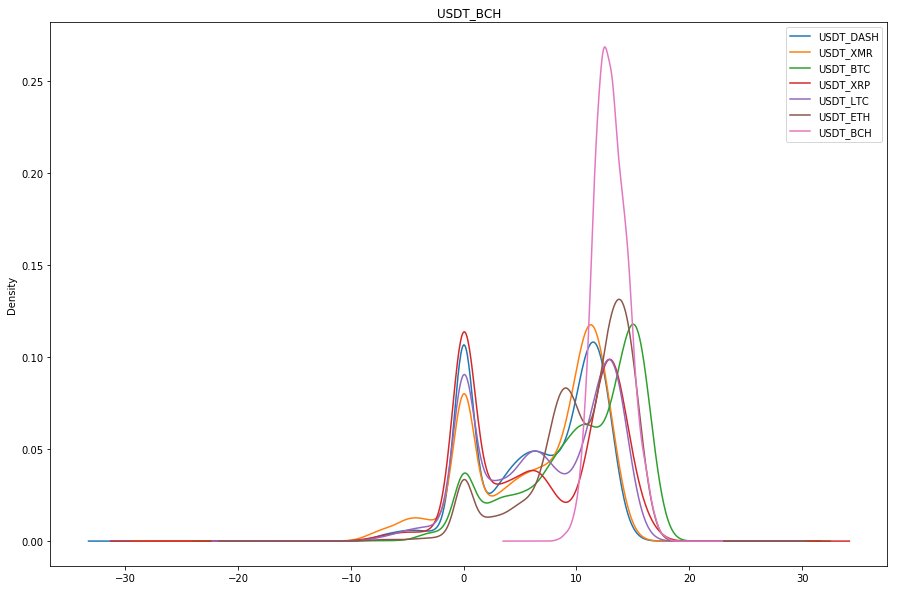

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='density',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","log_volume")

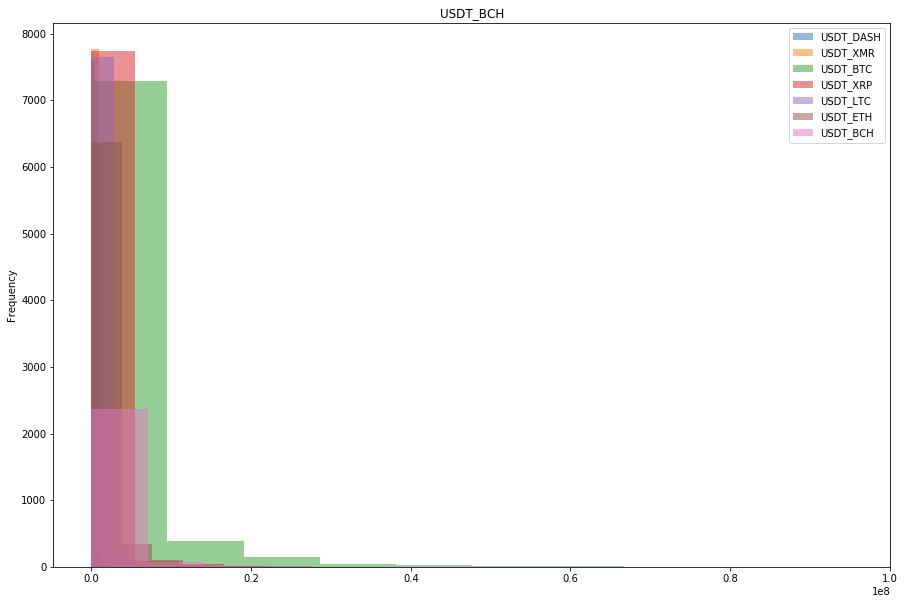

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","volume")

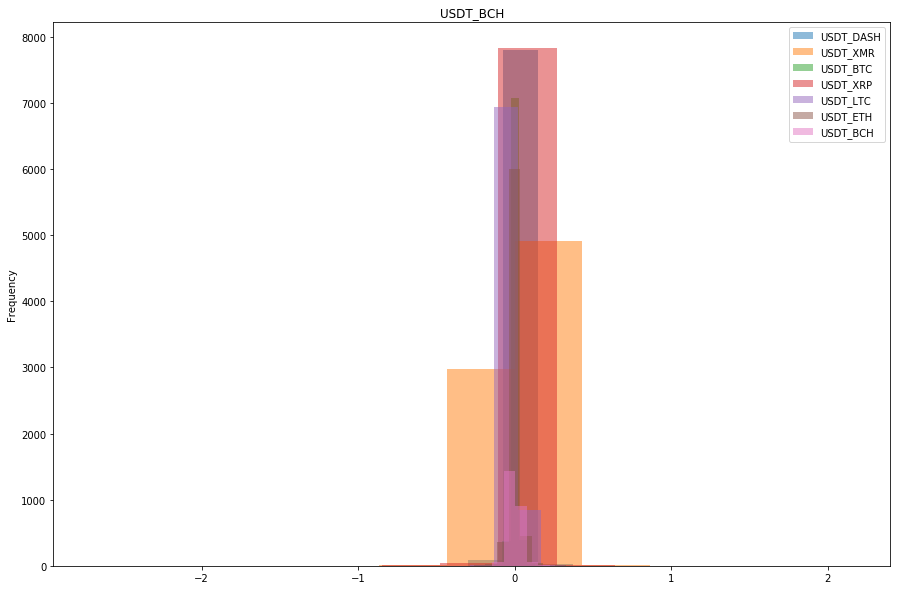

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","return")

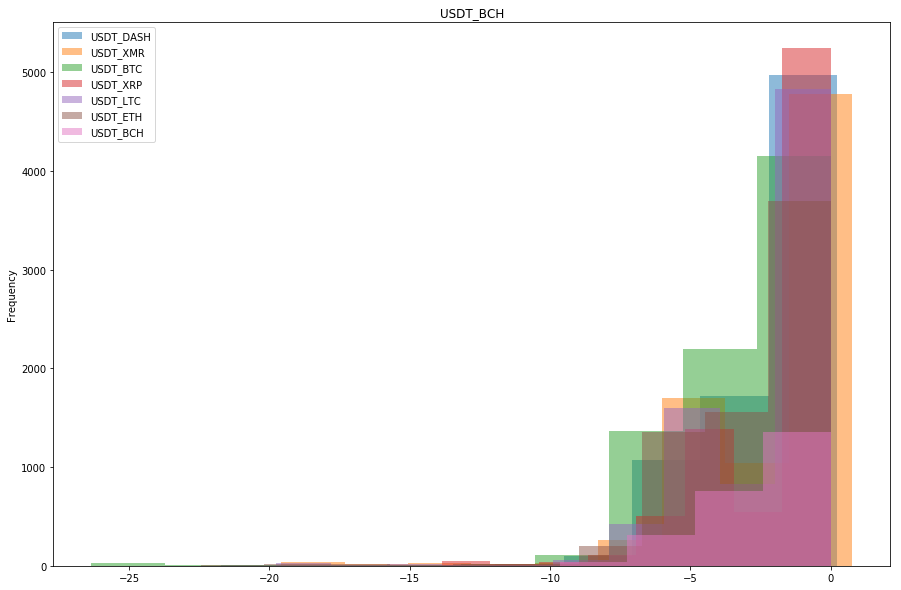

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "coin","log_return")

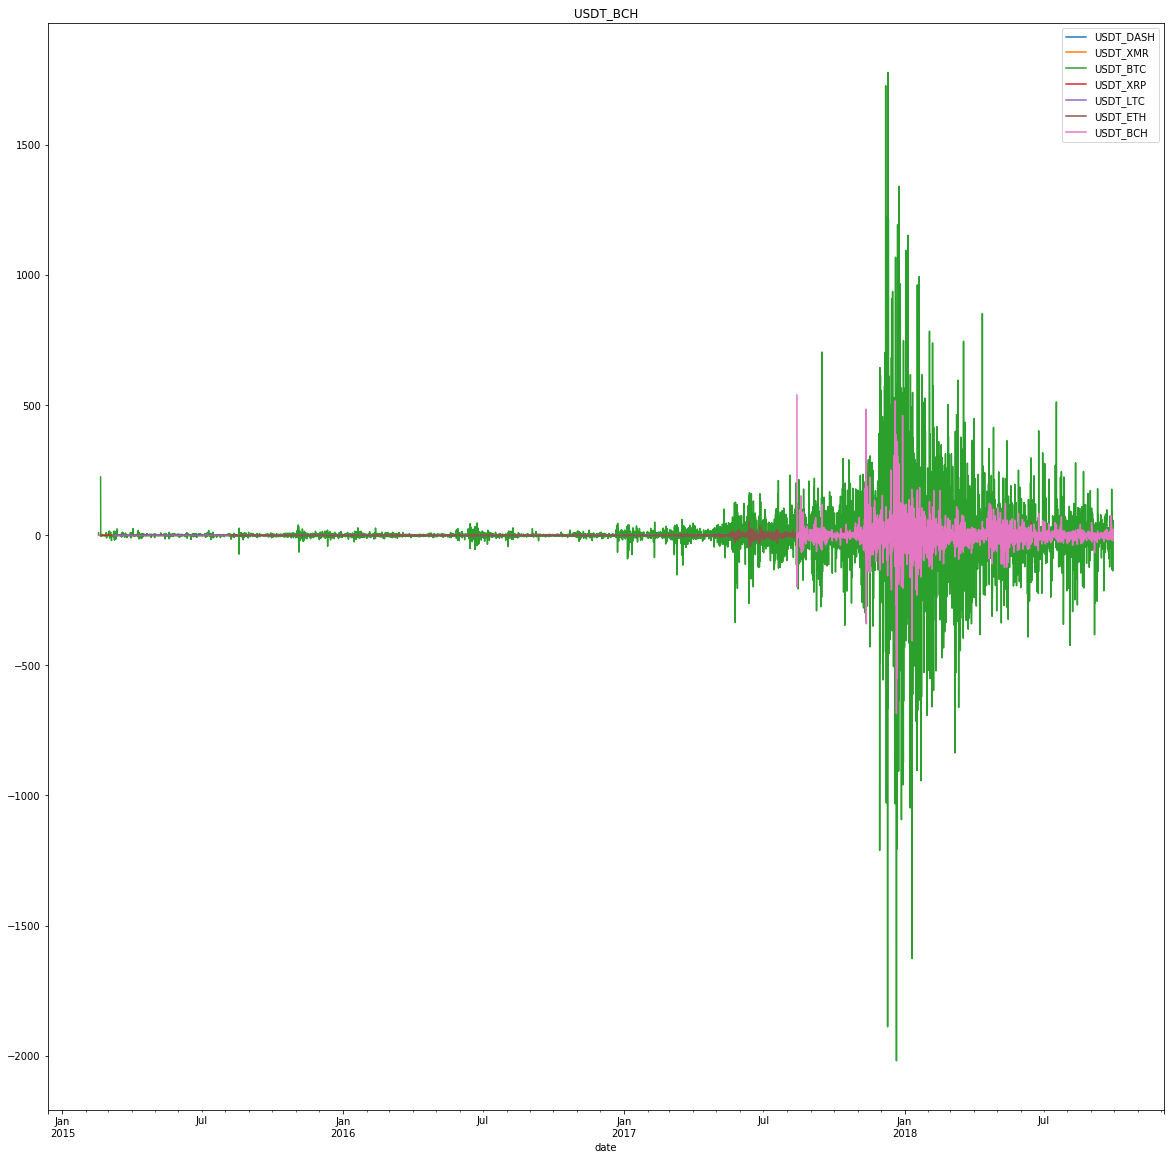

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY,scoin, log=False):    
    #data.dropna().plot(kind='density', figsize=(15,10))
    data.dropna().plot(kind='line', x=attrX, y=attrY, figsize=(20,20), ax=ax, label=scoin)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:        
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","variation")

Text(0.5, 1.0, 'Variação mês de Junho')

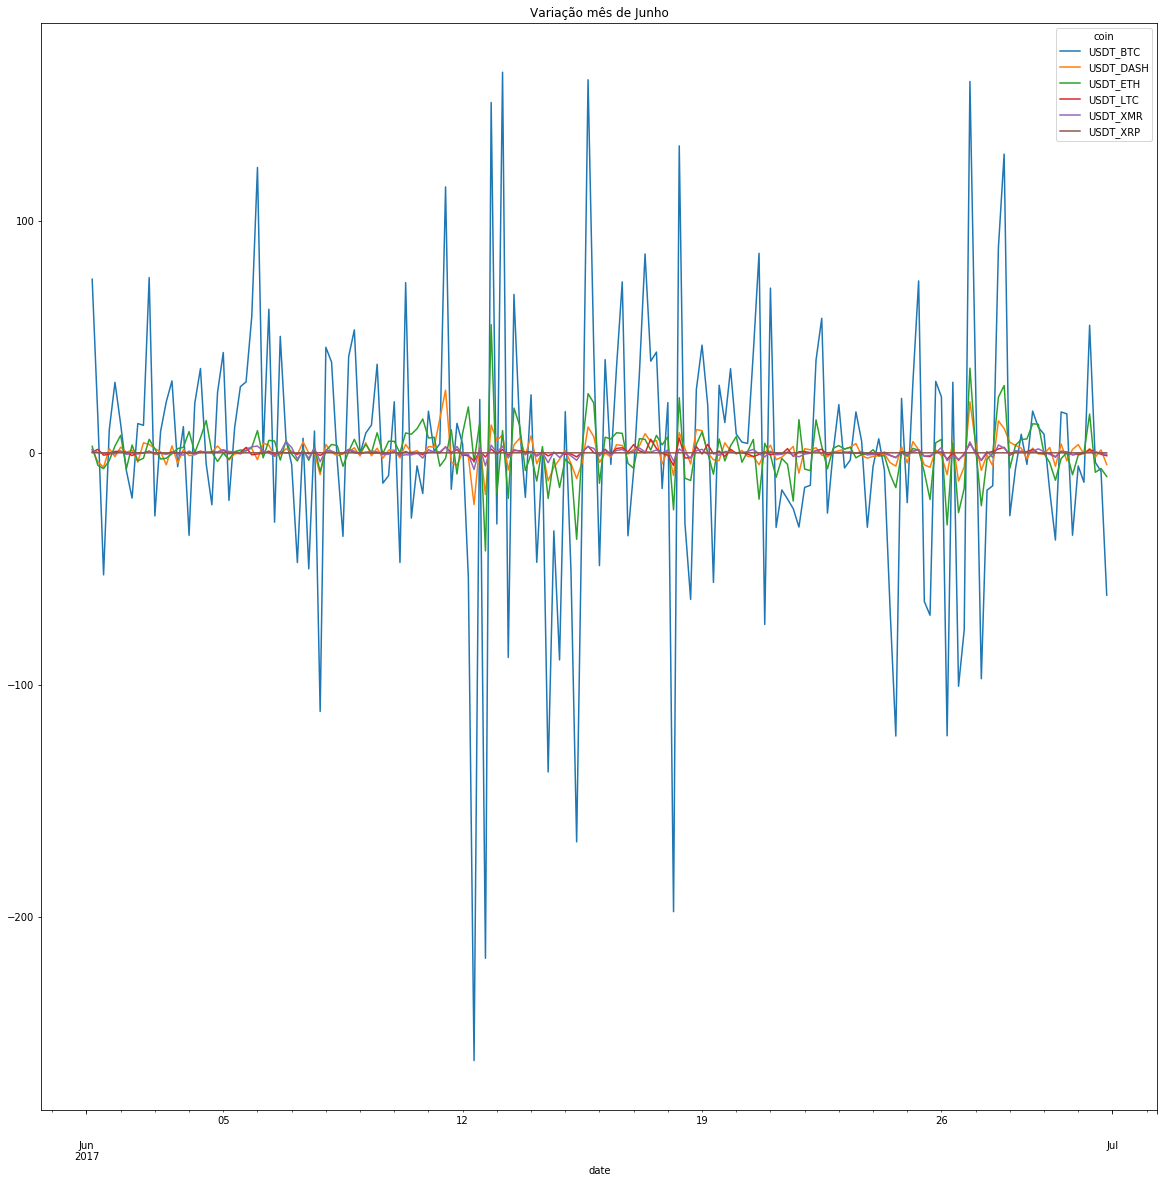

In [17]:
mes_jun.pivot(columns='coin', values='variation').plot(kind='line', figsize=(20,20))
plt.title('Variação mês de Junho')

Text(0.5, 1.0, 'Variação segunda parte mês de Junho')

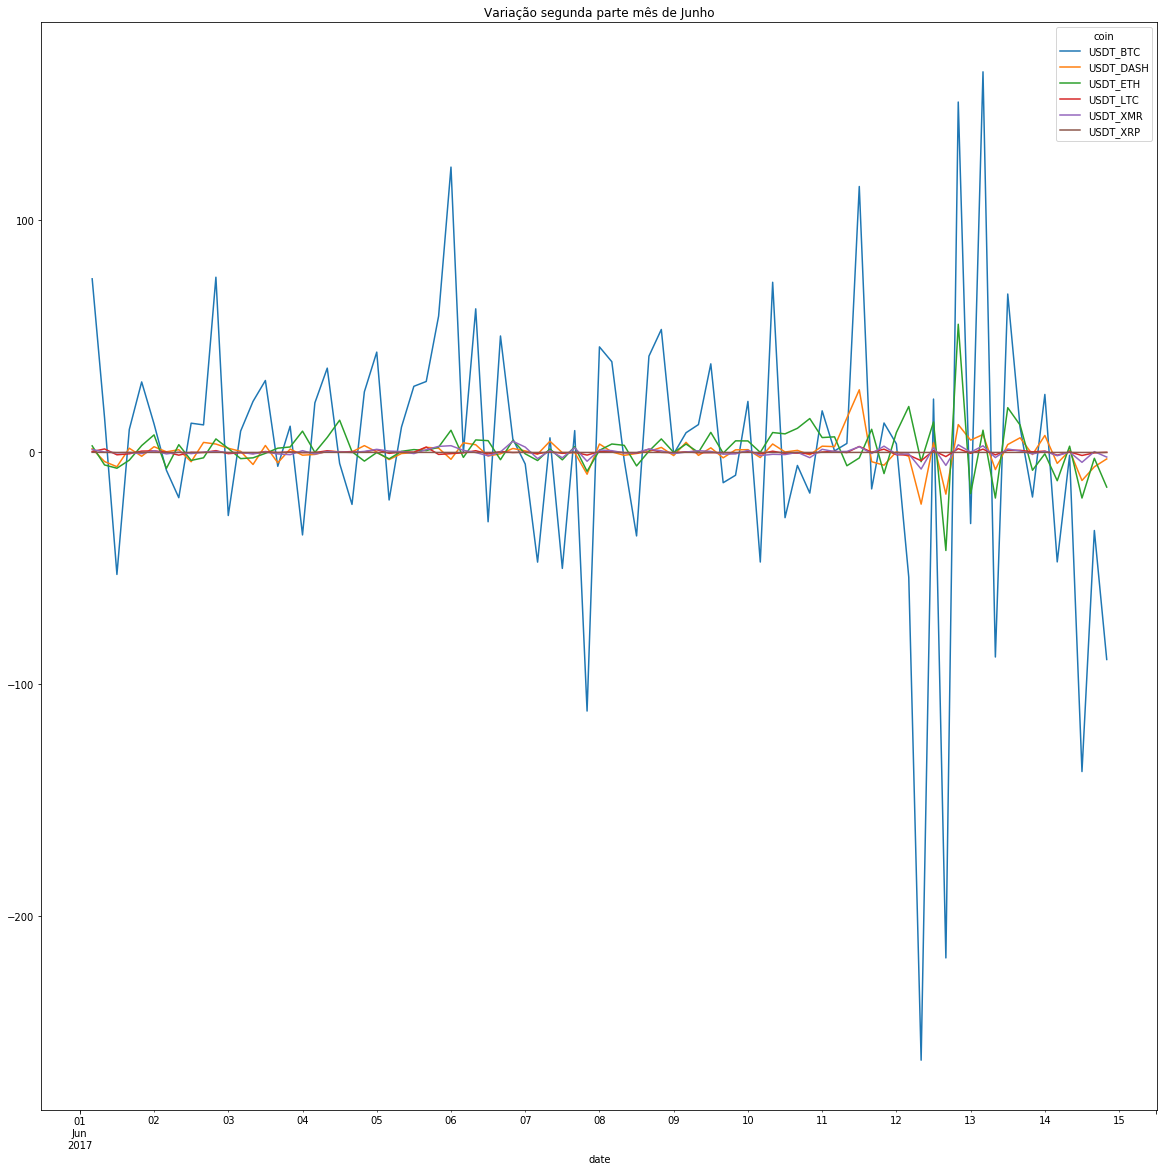

In [18]:
seg_part_jun.pivot(columns='coin', values='variation').plot(kind='line', figsize=(20,20))
plt.title('Variação segunda parte mês de Junho')

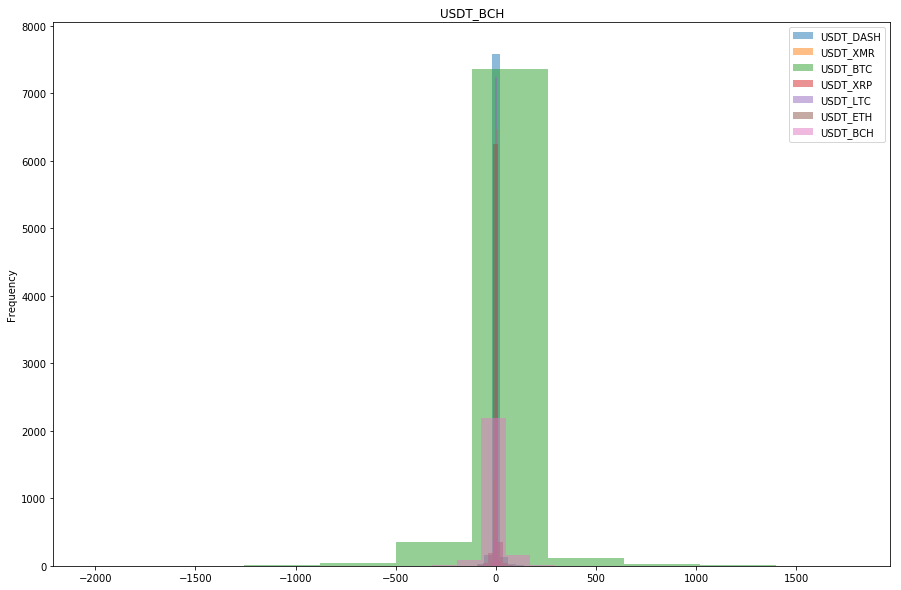

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

def plot_histogram(data, plt, attrX, attrY, scoin, log=False):    
    data.dropna().plot(kind='hist',x=attrX, y=attrY, figsize=(15,10),ax=ax, label=scoin, alpha=0.5)    

def plot_all_histograms(grouped_data, plt, attrX, attrY, log=False):
    
    sorted_grouped_data = sorted(
        grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
        key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
        reverse=True  # largest first
    )

    for scoin, stock_code_data in sorted_grouped_data:
        plot_histogram(stock_code_data, plt, attrX, attrY,scoin, log)        
        plt.title(scoin)

plot_all_histograms(grouped_data, plt, "date","variation")

Text(0.5, 1.0, 'Retorno segunda parte mês de Junho')

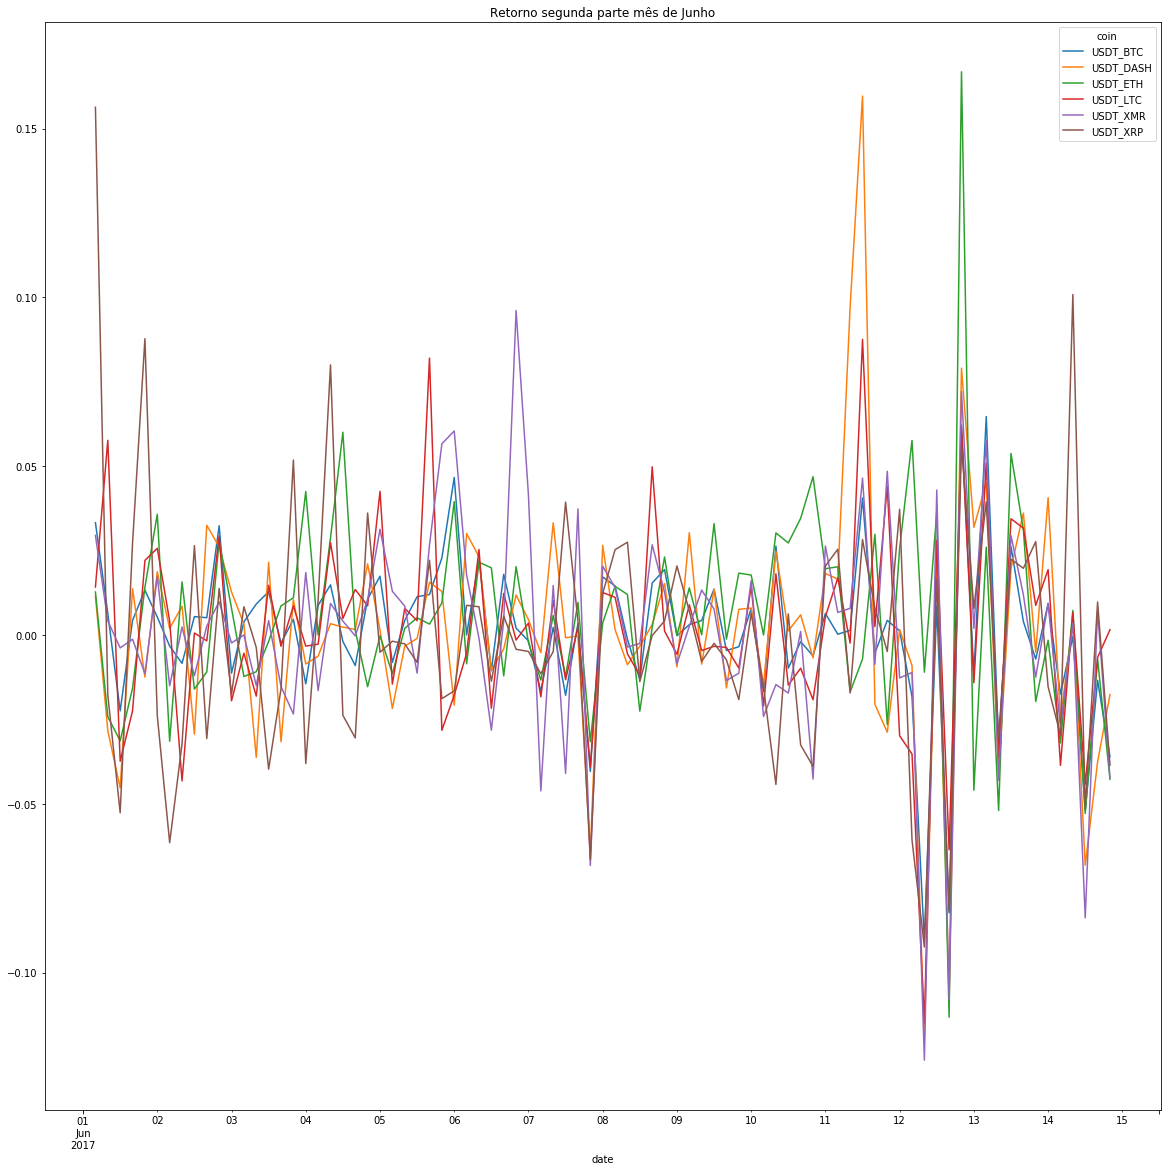

In [20]:
seg_part_jun.pivot(columns='coin', values='return').plot(kind='line', figsize=(20,20))
plt.title('Retorno segunda parte mês de Junho')

Text(0.5, 1.0, 'Retorno segunda parte mês de Junho')

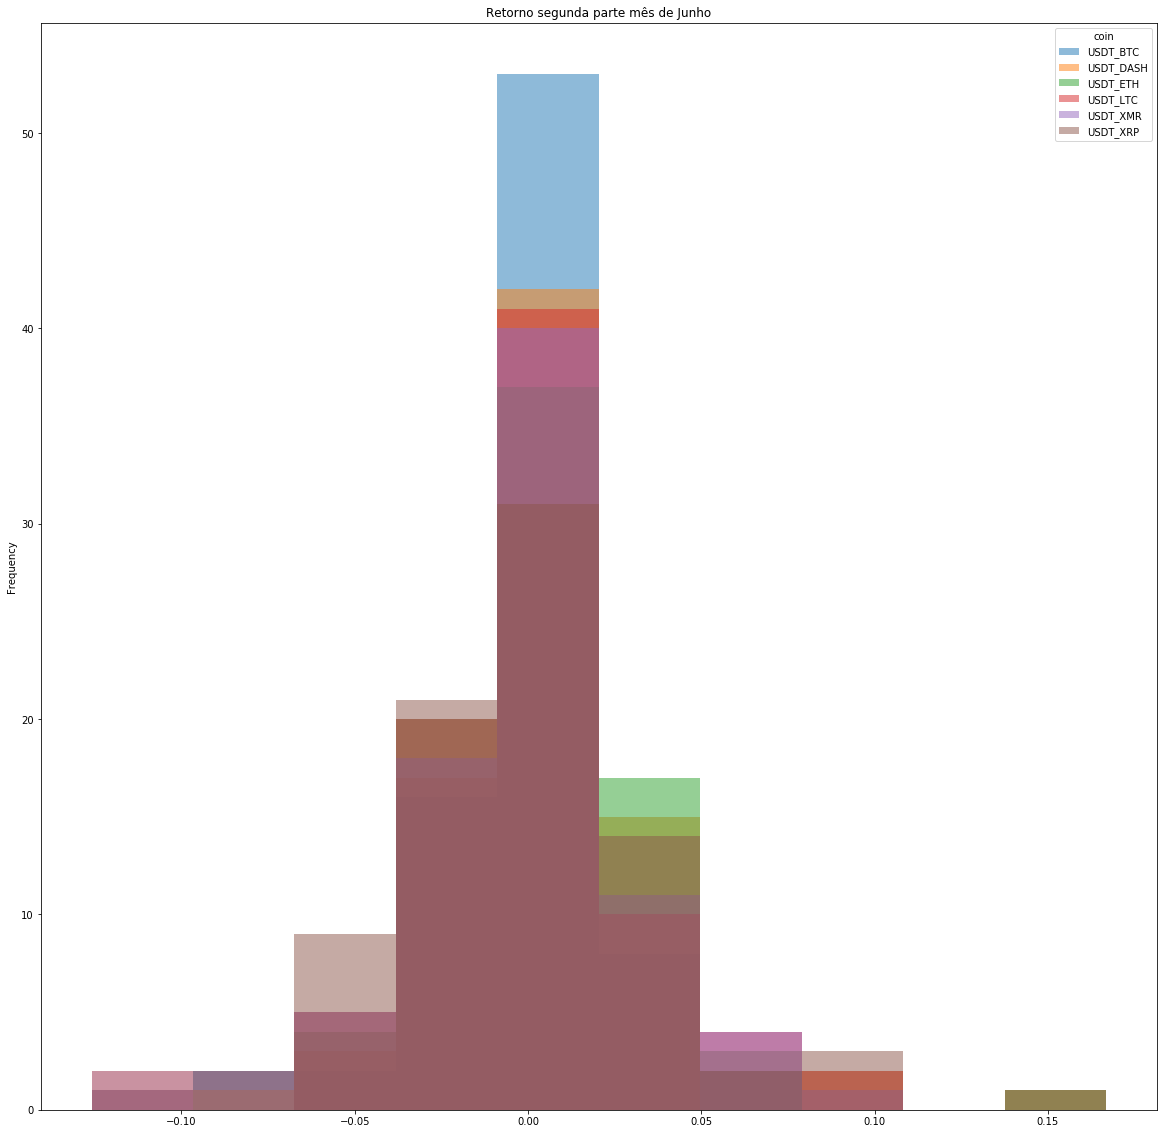

In [21]:
seg_part_jun.pivot(columns='coin', values='return').plot(kind='hist', figsize=(20,20), alpha=0.5)
plt.title('Retorno segunda parte mês de Junho')